<a href="https://colab.research.google.com/github/janabassemv/Customer-Segmentation/blob/main/Regression_Mini-Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Mining — Linear Regression — Mini-Project 1 (Energy Consumption)

**Course:** [CSEN911] Data Mining (Winter 2025)  
**Instructor:** Dr. Ayman Alserafi  
**Due:** 24 October 2025, 11:59 PM

**Dataset:** `energy_data.csv`  


> **Instructions:** For every step, write your own explanations and justifications and visualization in the provided Markdown prompts.




***Edit this cell with your name(s), tutorial number(s) and ID(s)***

---

Name:  Nada Ahmed

ID:58-9887

Tutorial: 11

---

Name: Jana Bassem

ID: 58-19575

Tutorial: 11

---


The dataset contains building-level energy readings and contextual attributes.

Each row represents a building observation. Columns include:

<div style="font-size:20px;">

| **Column** | **Description** |
|-------------|-----------------|
| **Building_ID** | Unique identifier for each building record. Used to distinguish one building entry from another. |
| **Building_Type** | Category describing the primary use of the building (e.g., Residential, Commercial, Industrial, Educational, etc.). |
| **Governorate** | The administrative region (governorate) where the building is located (e.g., Cairo, Giza, Alexandria). |
| **Neighborhood** | The smaller district or local area within the governorate where the building is located. |
| **Day_of_Week** | The day on which the energy consumption measurement was recorded (e.g., Sunday, Monday, etc.). |
| **Occupancy_Level** | The relative number of occupants or activity level in the building, typically categorized as *Low*, *Medium*, or *High*. |
| **Appliances_Usage_Level** | Indicates how intensively appliances are used in the building *Low*, *Medium*, or *High*. |
| **SquareFootage** | The total floor area of the building (numeric). Serves as a proxy for building size, often influencing energy usage. |
| **Last_Maintenance_Date** | The date of the last maintainance done on the building. |
| **Average_Temperature** | The average ambient temperature (in °C) recorded during the data period. |
| **Energy_Consumption** | The total energy used by the building, typically measured in kilowatt-hours (kWh).|

</div>


## Importing Libraries & Dataset

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

try:
    df = pd.read_csv('energy_data.csv')
except:
    df = pd.read_csv('https://raw.githubusercontent.com/GUC-DM/W2025/refs/heads/main/data/energy_data.csv')

df.head(20)

,Building_ID,Building_Type,Governorate,Neighborhood,Day_of_Week,Occupancy_Level,Appliances_Usage_Level,SquareFootage,Last_Maintenance_Date,Average_Temperature,Energy_Consumption
0,BLD-1000-UD,Residential,Alexandria,Smouha,WeDnesday,High,Low,7063m2,2020-01-01,28.61,2713.95 kWh
1,BLD-1001-AX,Commercial,Giza,+Mohandessin14,tuesDAY,High,High,44372m2,2022-02-24,NaN,5744.99 kWh
2,BLD-1002-IH,Industrial,Cairo,New Cairo,SunDay,Medium,Low,19255,2021-02-22,37.88,4101.24 kWh
3,BLD-1003-HE,NaN,NaN,+92Dokki,TuesDay,Low,High,13265,2023-07-30,35.06,3009.14 kWh
4,BLD-1004-XD,Commercial,Alexandria,Smouha,Monday,Low,Low,13375,2022-08-12,28.82,3279.17 kWh
5,BLD-1005-VX,Commercial,NaN,%9New Cairo,SunDay,Low,Medium,37377m2,2022-07-31,37.54,4687.67 kWh
6,BLD-1006-RC,Industrial,Cairo,Heliopolis_59,saturDAY,High,Low,38638m2,2023-07-07,50.00,5526.83 kWh
7,BLD-1007-SN,Residential,Cairo,New Cairo,tuesDAY,Medium,Low,34950m2,2020-07-29,38.51,4116.32 kWh
8,BLD-1008-BA,Industrial,Alexandria,Gleem(23,MoNday,High,High,29741m2,2024-12-31,43.62,5841.65 kWh
9,BLD-1009-CG,Residential,NaN,=Mohandessin10,FRIDAY,Medium,High,17467,2023-01-14,33.18,3419.13 kWh


## Data Inspection

Perform data inspection tasks here (recommended for data understanding).

In [51]:
df.info()                  #Displays dataset structure including column names, data types, and count of non null values
df.isnull().sum()          #Shows the number of missing values in every column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Building_ID             1100 non-null   object 
 1   Building_Type           990 non-null    object 
 2   Governorate             873 non-null    object 
 3   Neighborhood            1100 non-null   object 
 4   Day_of_Week             1100 non-null   object 
 5   Occupancy_Level         1100 non-null   object 
 6   Appliances_Usage_Level  1100 non-null   object 
 7   SquareFootage           1100 non-null   object 
 8   Last_Maintenance_Date   1100 non-null   object 
 9   Average_Temperature     990 non-null    float64
 10  Energy_Consumption      1100 non-null   object 
dtypes: float64(1), object(10)
memory usage: 94.7+ KB


,0
Building_ID,0
Building_Type,110
Governorate,227
Neighborhood,0
Day_of_Week,0
Occupancy_Level,0
Appliances_Usage_Level,0
SquareFootage,0
Last_Maintenance_Date,0
Average_Temperature,110


In [52]:
df.describe()  #shows summary statistics like count , mean , std and more for numerical columns

,Average_Temperature
count,990.000000
mean,33.499404
std,10.703806
min,-4.910000
25%,29.422500
50%,35.260000
75%,39.970000
max,50.000000


## Data Pre-Processing & Cleaning

_Apply any data preprocessing and/or feature engineering below. Show/output the changes to the dataset._

In [53]:
df=df.drop('Building_ID', axis=1)
df['Neighborhood'] = df['Neighborhood'].str.replace(r'[^a-zA-Z \s]','', regex=True)                         #removes anything that is not a letter or a space

df['Day_of_Week']= df['Day_of_Week'].str.lower().str.capitalize()                                           #Turns all letters to lower case then capitalizes the first letter

df['SquareFootage']= df['SquareFootage']. str.replace('m2', '', regex=True)                                 #removes the m2 that is in some of the SquareFootage values
df['SquareFootage']= df['SquareFootage']. str.replace(r'[^0-9\s]', '', regex=True)                          #removes anything that is not a number or a space
df['Energy_Consumption']= df['Energy_Consumption']. str.replace(r'[^0-9\s]', '', regex=True)                #removes anything that is not a number or a space

df.loc[(df['Neighborhood'] == "New Cairo")| (df['Neighborhood'] == "Heliopolis")| (df['Neighborhood'] == "Maadi") & (df['Governorate'].isna()), 'Governorate'] = "Cairo"    #Fills in all NaN in Government with Cairo for Neighborhood New Cairo and Helioplis
df.loc[(df['Neighborhood'] == "Dokki") | (df['Neighborhood'] == "Mohandessin") & (df['Governorate'].isna()), 'Governorate'] = "Giza"       #Fills in all NaN in Government with Giza for Neighborhood Dokki and Mohandessin
df.loc[(df['Neighborhood'] == "Smouha") | (df['Neighborhood'] == "Gleem") & (df['Governorate'].isna()), 'Governorate'] = "Alexandria"      #Fills in all NaN in Government with Alexandria for Neighborhood Gleem and Smouha

df['SquareFootage']= df['SquareFootage']. str.replace(r'[^0-9\s]', '', regex=True)



df['Building_Type'] = df['Building_Type'].fillna(df['Building_Type'].mode()[0])                                               #Fills in all NaN in Building_Type with the most repeated type
df['Average_Temperature'] = df['Average_Temperature'].fillna(round(df['Average_Temperature'].median(), 2)).round(2)             #Fills in all NaN in Average_Temperature with the mode

temp = df['Average_Temperature']
df['Average_Temperature'] = temp
#removing outliers using quartiels method
Q1 = df['Average_Temperature'].quantile(0.25)
Q3 = df['Average_Temperature'].quantile(0.75)
iqr = Q3 - Q1
lowbound = Q1 - 1.5 * iqr
upbound = Q3 + 1.5 * iqr
df = df[(df['Average_Temperature'] >= lowbound) & (df['Average_Temperature'] <= upbound)]

df['Energy_Consumption'] = pd.to_numeric(df['Energy_Consumption'], errors='coerce')
eng_consump = df['Energy_Consumption']
df['Energy_Consumption'] = eng_consump
#removing outliers using quartiels method
Q1 = df['Energy_Consumption'].quantile(0.25)
Q3 = df['Energy_Consumption'].quantile(0.75)
iqr = Q3 - Q1
lowbound = Q1 - 1.5 * iqr
upbound = Q3 + 1.5 * iqr
df = df[(df['Energy_Consumption'] >= lowbound) & (df['Energy_Consumption'] <= upbound)]










df.iloc[630:660]




,Building_Type,Governorate,Neighborhood,Day_of_Week,Occupancy_Level,Appliances_Usage_Level,SquareFootage,Last_Maintenance_Date,Average_Temperature,Energy_Consumption
736,Residential,Cairo,Maadi,Sunday,High,Medium,15898,2021-09-13,31.63,337738
737,Residential,Cairo,New Cairo,Friday,Low,High,8406,2020-01-01,31.60,284291
739,Industrial,Cairo,New Cairo,Friday,High,High,2550,2023-05-29,41.22,437459
740,Residential,Giza,Dokki,Sunday,High,Low,47719,2024-12-31,37.08,578183
742,Industrial,Alexandria,Gleem,Sunday,Medium,Low,20456,2024-08-11,31.37,397514
743,Industrial,Giza,Mohandessin,Tuesday,High,High,46265,2023-06-19,48.15,621259
744,Residential,Cairo,New Cairo,Thursday,Low,Medium,46526,2020-11-25,35.26,427666
745,Residential,Alexandria,Smouha,Sunday,Medium,High,2262,2021-08-14,35.26,287263
746,Industrial,Giza,Mohandessin,Monday,High,High,10681,2023-06-03,39.11,463528
747,Residential,Cairo,Maadi,Wednesday,High,Low,49438,2022-02-09,38.52,522535


<Axes: ylabel='SquareFootage'>

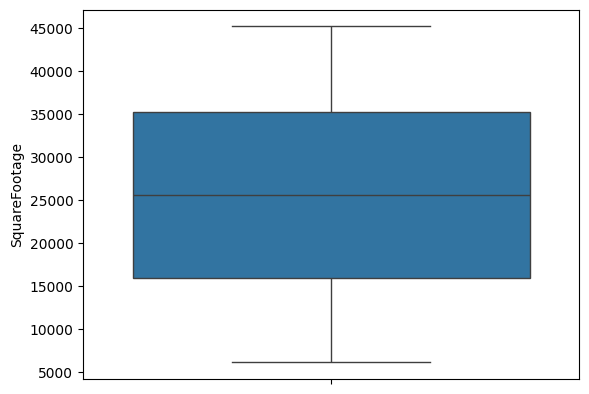

In [54]:
df['SquareFootage'] = pd.to_numeric(df['SquareFootage'], errors='coerce')
#now we will remove the outliers using the same method we used for the avg temp however it wont be very similar as the data is more spread than the avg temp such the iqr will be very small and remove most of my data #thus i am using percentile not iqr
lower_limit = df['SquareFootage'].quantile(0.10)
upper_limit = df['SquareFootage'].quantile(0.90)
df = df[(df['SquareFootage'] >= lower_limit) & (df['SquareFootage'] <= upper_limit)]
sns.boxplot(df['SquareFootage'])

## Exploratory Data Analysis

In [55]:
#Feature Engineering:

df['Last_Maintenance_Date'] = pd.to_datetime(df['Last_Maintenance_Date'], errors='coerce')                           #Convert to datetime
df['Days_since_last_maintenance'] = (pd.Timestamp('today') - df['Last_Maintenance_Date']).dt.days                    #Calculate days since last maintenance
df['Days_since_last_maintenance'] = df['Days_since_last_maintenance'].fillna(df['Days_since_last_maintenance'].median()).astype(int)      #Handle missing values

df['Day_type'] = np.where(df['Day_of_Week'].isin(['Friday', 'Saturday']), 'Weekend', 'Weekday')                      #Create Day_type column where 'Weekend'is  for Friday and Saturday, 'Weekday' otherwise
df['Day_type'] = df['Day_type'].astype('category')                                                                   #Convert to categorical type
df[['Days_since_last_maintenance', 'Day_of_Week', 'Day_type']].head(20)                                              #To check the results nof both feature engineering questions


df.iloc[630:660]

,Building_Type,Governorate,Neighborhood,Day_of_Week,Occupancy_Level,Appliances_Usage_Level,SquareFootage,Last_Maintenance_Date,Average_Temperature,Energy_Consumption,Days_since_last_maintenance,Day_type
924,Commercial,Cairo,Heliopolis,Friday,High,Low,10016,2020-09-19,36.23,343774,1859,Weekend
925,Residential,Alexandria,Gleem,Tuesday,Medium,Medium,13487,2020-04-25,21.92,310102,2006,Weekday
926,Residential,Alexandria,Gleem,Wednesday,Low,Low,15399,2020-01-01,35.26,247855,2121,Weekday
927,Residential,Alexandria,Smouha,Saturday,Medium,Low,16978,2022-06-29,33.23,354662,1211,Weekend
929,Residential,Giza,Dokki,Wednesday,Low,Low,32913,2021-01-10,30.93,349682,1746,Weekday
932,Commercial,Alexandria,Gleem,Sunday,Medium,Medium,42152,2022-12-13,33.14,485908,1044,Weekday
933,Residential,Cairo,New Cairo,Saturday,Low,Medium,31980,2022-06-19,25.23,412684,1221,Weekend
934,Industrial,Alexandria,Smouha,Sunday,High,Medium,22304,2024-03-15,41.75,487826,586,Weekday
937,Industrial,Alexandria,Smouha,Sunday,Medium,High,44913,2024-12-31,50.00,613017,295,Weekday
938,Residential,Cairo,New Cairo,Saturday,High,High,27157,2023-10-15,39.66,468244,738,Weekend


**Q1:** What are the most popular neighborhoods? plot all and order them on the graph (mention top 3)

**Visualization**

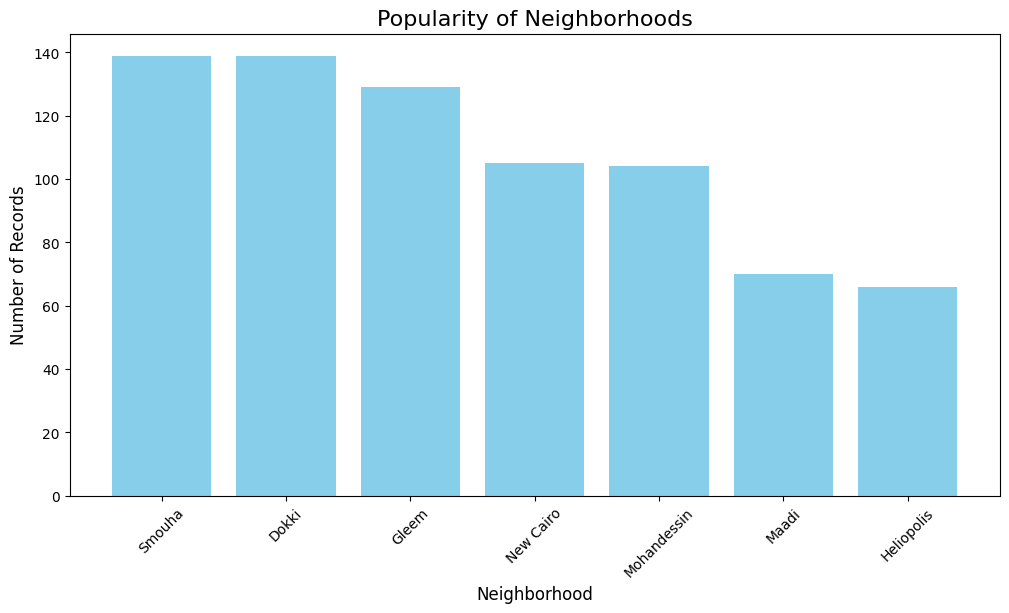

In [56]:
neighborhood_counts = df['Neighborhood'].value_counts() #count how many times a neighborhood appears
plt.figure(figsize=(12,6)) #the figure size
plt.bar(neighborhood_counts.index, neighborhood_counts.values, color='skyblue')#bar chart plotting
plt.title('Popularity of Neighborhoods', fontsize=16)# writing the title of the chart
plt.xlabel('Neighborhood', fontsize=12) # name of the x label
plt.ylabel('Number of Records', fontsize=12) #name of y label
plt.xticks(rotation=45) # Rotate x-axis labels so they are not messy and can be read
plt.show()#to show the plot results


**Answer for Q1:** The top 3 neighborhoods are Smouha , dokki and Gleem and they are followed by Mohandessin , New Cairo , Maadi and Heliopolis

**Q2:** Show the distribution of the energy consumption of each Building type.

Which type have the widest distribution of energy consumption?

Which (on average) has the highest consumption?.

**Visualization**

Minimum: 202015
Maximum: 613017


<Figure size 1200x600 with 0 Axes>

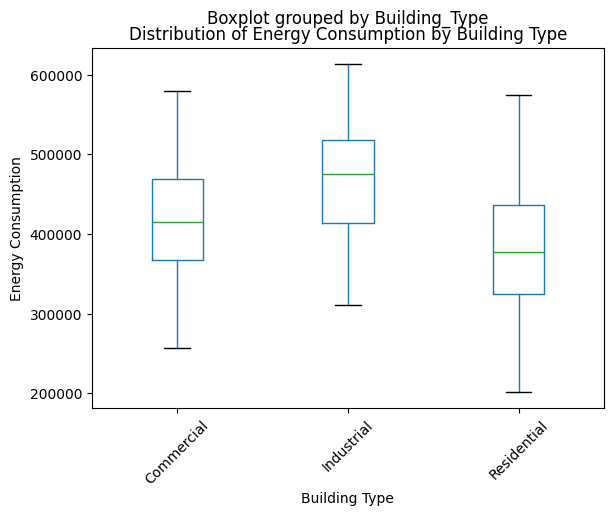

In [57]:
df['Energy_Consumption'] = pd.to_numeric(df['Energy_Consumption'], errors='coerce')
plt.figure(figsize=(12,6)) #set  figure size
df.boxplot(column='Energy_Consumption', by='Building_Type', grid=False)
plt.title('Distribution of Energy Consumption by Building Type')
plt.xlabel('Building Type')# name of the x label
plt.ylabel('Energy Consumption')# name of the x label
plt.xticks(rotation=45)# Rotate x-axis labels so they are not messy and can be read
df[['Building_Type','Energy_Consumption']].head(50)
min_value = df['Energy_Consumption'].min()
max_value = df['Energy_Consumption'].max()

print("Minimum:", min_value)
print("Maximum:", max_value)
plt.show()


**Answer for Q2:** Residential has the widest distribution of energy consumption (with minimum value of 1787 and the maximum value of around 600000)and Industrial has the highest distribution of energy consumption (with minimum value greater than 250000 and the maximum value of 649348).  

**Q3:** How does the building size affect energy consumption?

**Visualization**

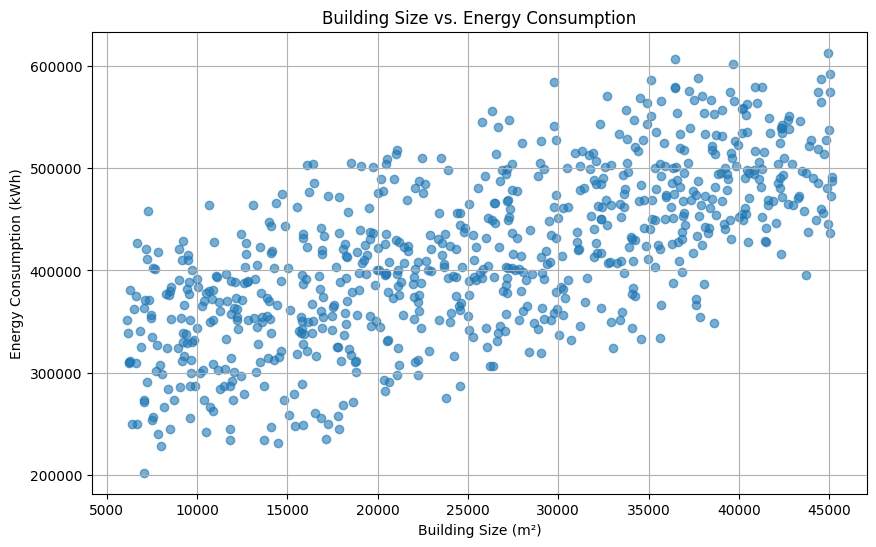

In [58]:
df['Energy_Consumption'] = pd.to_numeric(df['Energy_Consumption'], errors='coerce')
df['SquareFootage'] = pd.to_numeric(df['SquareFootage'], errors='coerce')
plt.figure(figsize=(10,6))
plt.scatter(df['SquareFootage'], df['Energy_Consumption'], alpha=0.6)
plt.title('Building Size vs. Energy Consumption')
plt.xlabel('Building Size (m²)')
plt.ylabel('Energy Consumption (kWh)')
plt.grid(True)
plt.show()


**Answer for Q3:** Building size and energy consumption have a positive correlation and as building size increases , energy consumption increases

**Q4:** Do buildings consume more energy if not maintained frequently?

**Visualization**

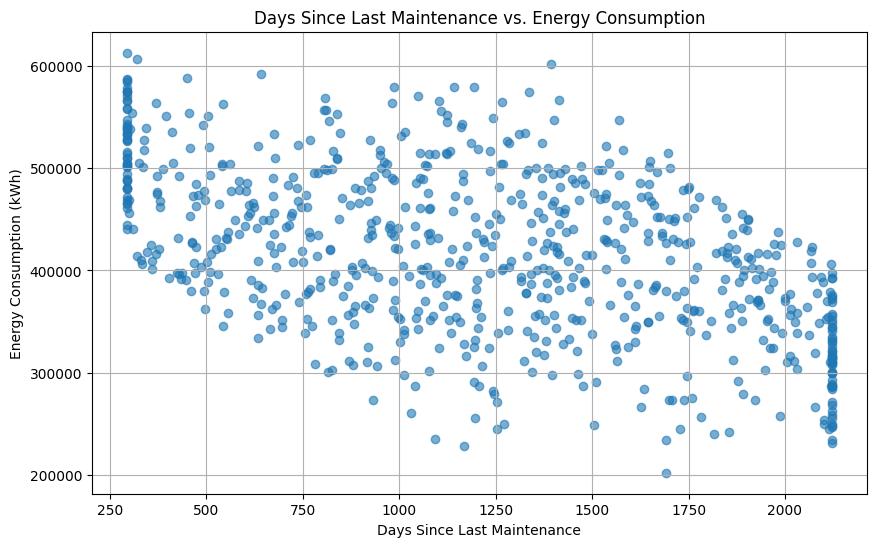

In [59]:
df['Energy_Consumption'] = pd.to_numeric(df['Energy_Consumption'], errors='coerce')
plt.figure(figsize=(10,6))
plt.scatter(df['Days_since_last_maintenance'], df['Energy_Consumption'], alpha=0.6)
plt.title('Days Since Last Maintenance vs. Energy Consumption')
plt.xlabel('Days Since Last Maintenance')
plt.ylabel('Energy Consumption (kWh)')
plt.grid(True)
plt.show()

**Answer for Q4: Yes, buildings consume less energy as the days since their last maintenance increase.

**Q5:** Are all the numerical variables normally distributed, or is there any skewness?

**Visualization**

Index(['SquareFootage', 'Average_Temperature', 'Energy_Consumption',
       'Days_since_last_maintenance'],
      dtype='object')


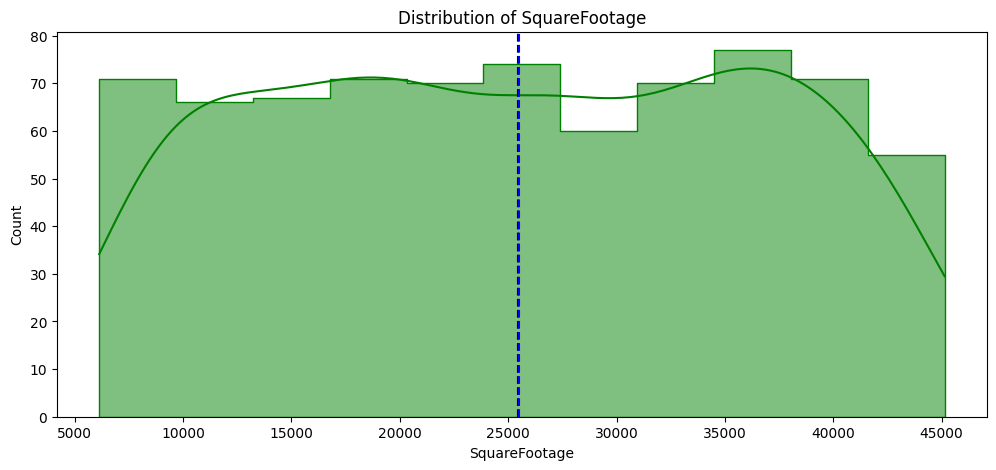

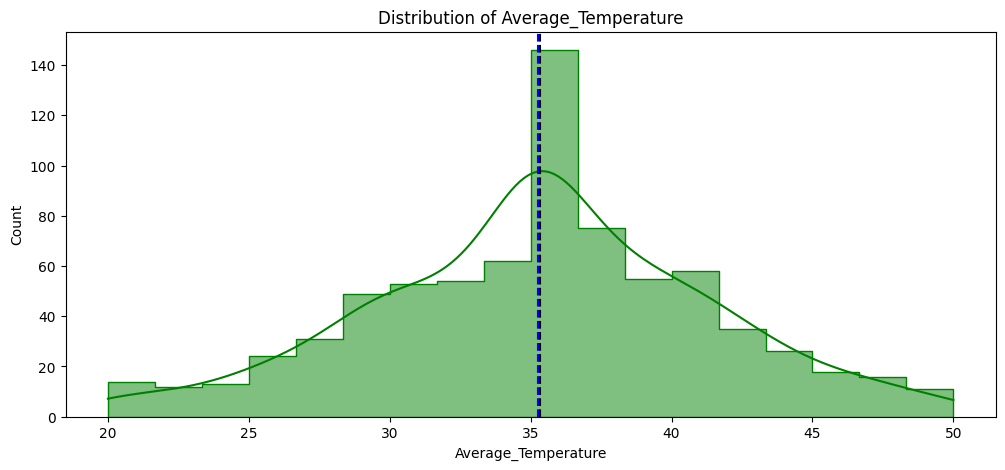

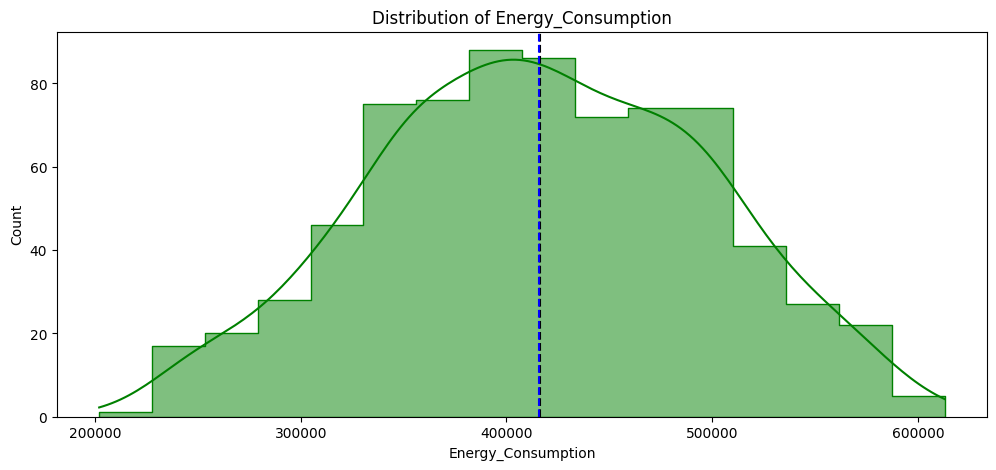

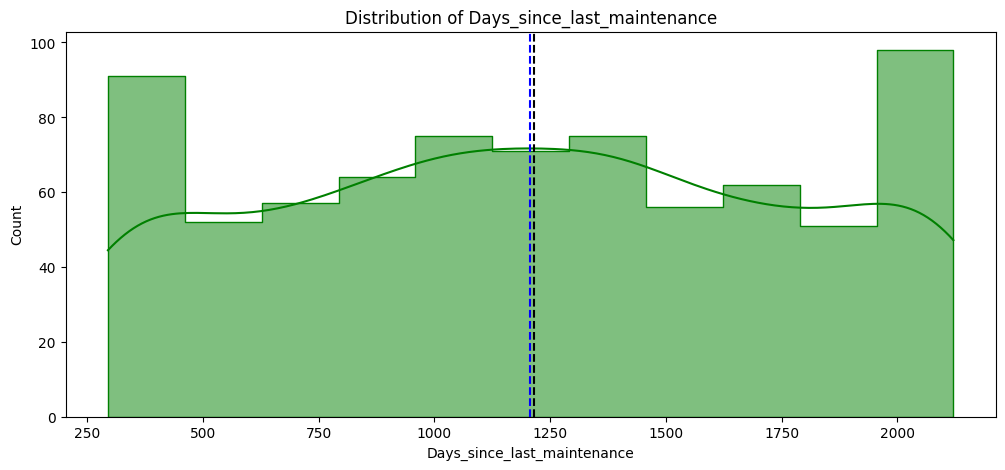

In [74]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
print(numeric_cols)
for col in numeric_cols:
    plt.figure(figsize=(12,5))
    plt.title(f'Distribution of {col}')
    x= sns.histplot(df[col], color = 'g', element='step', kde=True)
    x.axvline(df[col].mean(), color='k', linestyle='--')
    x.axvline(df[col].median(), color='b', linestyle='--')

**Answer for Q5:** _Your answer here_

**Q6:** What is multicollinearity? And why is it a problem for linear regression? Does this problem exist in this
dataset?

**Visualization**

In [61]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant


X = df[['SquareFootage', 'Average_Temperature', 'Days_since_last_maintenance']].dropna()
X = add_constant(X)

vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print("Variance Inflation Factors (VIF):")
print(vif_data)

Variance Inflation Factors (VIF):
                       Feature        VIF
0                        const  55.945465
1                SquareFootage   1.361746
2          Average_Temperature   1.374280
3  Days_since_last_maintenance   1.202691


**Answer for Q6:** Multicollinearity is when two or more independent variables in a regression model are highly correlated with each other. Multicollinearity is a problem for the linear regression since linear regression aims to reduce the difference between the observed dependent variable in the given data set and those predicted by linear regression function, so multicollinerity makes it harder for us to see the effect of each variable on the outcome.

We do not have this problem in our data.

## Data Preparation for Modelling

_Apply any additional data preparation steps needed before modelling below. Show/output the changes to the dataset._

In [62]:
df.head(40)

,Building_Type,Governorate,Neighborhood,Day_of_Week,Occupancy_Level,Appliances_Usage_Level,SquareFootage,Last_Maintenance_Date,Average_Temperature,Energy_Consumption,Days_since_last_maintenance,Day_type
0,Residential,Alexandria,Smouha,Wednesday,High,Low,7063,2020-01-01,28.61,271395,2121,Weekday
1,Commercial,Giza,Mohandessin,Tuesday,High,High,44372,2022-02-24,35.26,574499,1336,Weekday
2,Industrial,Cairo,New Cairo,Sunday,Medium,Low,19255,2021-02-22,37.88,410124,1703,Weekday
3,Residential,Giza,Dokki,Tuesday,Low,High,13265,2023-07-30,35.06,300914,815,Weekday
4,Commercial,Alexandria,Smouha,Monday,Low,Low,13375,2022-08-12,28.82,327917,1167,Weekday
5,Commercial,Cairo,New Cairo,Sunday,Low,Medium,37377,2022-07-31,37.54,468767,1179,Weekday
6,Industrial,Cairo,Heliopolis,Saturday,High,Low,38638,2023-07-07,50.00,552683,838,Weekend
7,Residential,Cairo,New Cairo,Tuesday,Medium,Low,34950,2020-07-29,38.51,411632,1911,Weekday
8,Industrial,Alexandria,Gleem,Monday,High,High,29741,2024-12-31,43.62,584165,295,Weekday
9,Residential,Giza,Mohandessin,Friday,Medium,High,17467,2023-01-14,33.18,341913,1012,Weekend


In [63]:
df.drop(columns=['Day_of_Week'], inplace=True)
df.drop(columns=['Last_Maintenance_Date'], inplace=True)
df.drop(columns=['Neighborhood'], inplace=True)
df.head(40)

,Building_Type,Governorate,Occupancy_Level,Appliances_Usage_Level,SquareFootage,Average_Temperature,Energy_Consumption,Days_since_last_maintenance,Day_type
0,Residential,Alexandria,High,Low,7063,28.61,271395,2121,Weekday
1,Commercial,Giza,High,High,44372,35.26,574499,1336,Weekday
2,Industrial,Cairo,Medium,Low,19255,37.88,410124,1703,Weekday
3,Residential,Giza,Low,High,13265,35.06,300914,815,Weekday
4,Commercial,Alexandria,Low,Low,13375,28.82,327917,1167,Weekday
5,Commercial,Cairo,Low,Medium,37377,37.54,468767,1179,Weekday
6,Industrial,Cairo,High,Low,38638,50.00,552683,838,Weekend
7,Residential,Cairo,Medium,Low,34950,38.51,411632,1911,Weekday
8,Industrial,Alexandria,High,High,29741,43.62,584165,295,Weekday
9,Residential,Giza,Medium,High,17467,33.18,341913,1012,Weekend


In [64]:
categorical_columns = ['Building_Type', 'Occupancy_Level', 'Appliances_Usage_Level', 'Governorate','Day_type']
df_encode = pd.get_dummies(data=df,
                           columns=categorical_columns,
                           drop_first=True,
                           dtype='int8')
df_encode.head()

,SquareFootage,Average_Temperature,Energy_Consumption,Days_since_last_maintenance,Building_Type_Industrial,Building_Type_Residential,Occupancy_Level_Low,Occupancy_Level_Medium,Appliances_Usage_Level_Low,Appliances_Usage_Level_Medium,Governorate_Cairo,Governorate_Giza,Day_type_Weekend
0,7063,28.61,271395,2121,0,1,0,0,1,0,0,0,0
1,44372,35.26,574499,1336,0,0,0,0,0,0,0,1,0
2,19255,37.88,410124,1703,1,0,0,1,1,0,1,0,0
3,13265,35.06,300914,815,0,1,1,0,0,0,0,1,0
4,13375,28.82,327917,1167,0,0,1,0,1,0,0,0,0


In [65]:
numerical_columns = ['SquareFootage', 'Average_Temperature', 'Energy_Consumption', 'Days_since_last_maintenance']

df_encode[numerical_columns] = (

    df_encode[numerical_columns] - df_encode[numerical_columns].min()

) /(

    df_encode[numerical_columns].max() - df_encode[numerical_columns].min()
)

df_encode.head()

,SquareFootage,Average_Temperature,Energy_Consumption,Days_since_last_maintenance,Building_Type_Industrial,Building_Type_Residential,Occupancy_Level_Low,Occupancy_Level_Medium,Appliances_Usage_Level_Low,Appliances_Usage_Level_Medium,Governorate_Cairo,Governorate_Giza,Day_type_Weekend
0,0.024016,0.287000,0.168807,1.000000,0,1,0,0,1,0,0,0,0
1,0.980290,0.508667,0.906283,0.570099,0,0,0,0,0,0,0,1,0
2,0.336512,0.596000,0.506345,0.771084,1,0,0,1,1,0,1,0,0
3,0.182981,0.502000,0.240629,0.284775,0,1,1,0,0,0,0,1,0
4,0.185800,0.294000,0.306329,0.477547,0,0,1,0,1,0,0,0,0


In [66]:
from sklearn.model_selection import train_test_split

x = df_encode.drop('Energy_Consumption',axis=1) # Independent variable
y = df_encode['Energy_Consumption'] # Dependent variable

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=23)

print('Training dataset size:', x_train.shape[0])
print('Testing dataset size:', x_test.shape[0])

Training dataset size: 601
Testing dataset size: 151


## Modelling

_Apply the linear regression model below._

In [67]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

lin_reg.fit(x_train, y_train);

In [68]:
parameter = ['theta_0'] + ['theta_{}'.format(i+1) for i in range(x.shape[1])]
columns = ['y-intersect'] + list(x.columns.values)
sk_theta = pd.Series([lin_reg.intercept_] + list(lin_reg.coef_))

parameter_df = pd.DataFrame({'parameter':parameter,'column':columns, 'theta_value': sk_theta})
parameter_df

,parameter,column,theta_value
0,theta_0,y-intersect,0.427665
1,theta_1,SquareFootage,0.434907
2,theta_2,Average_Temperature,0.094564
3,theta_3,Days_since_last_maintenance,-0.027138
4,theta_4,Building_Type_Industrial,0.108309
5,theta_5,Building_Type_Residential,-0.089308
6,theta_6,Occupancy_Level_Low,-0.147801
7,theta_7,Occupancy_Level_Medium,-0.074733
8,theta_8,Appliances_Usage_Level_Low,-0.148009
9,theta_9,Appliances_Usage_Level_Medium,-0.068658


## Model Evaluation

Evaluate the model you applied.

In [69]:
# sklearn regression module
y_pred = lin_reg.predict(x_test)

# Evaluation

#If you are using a local python notebook uncomment the RMSE line below and run
#from sklearn.metrics import mean_squared_error
#rmse = mean_squared_error(y_pred, y_test, squared=False)

#If you are using a cloud python notebook run the below RSME line
from sklearn.metrics import root_mean_squared_error
rmse=root_mean_squared_error(y_pred, y_test)

# R_square
R_square = lin_reg.score(x_test,y_test)
print('The root mean square error (RMSE) is: ', rmse)
print('R^2 obtained is:', R_square)

The root mean square error (RMSE) is:  0.05500492813148984
R^2 obtained is: 0.9261320611626533


In [70]:
from sklearn.metrics import mean_absolute_percentage_error, median_absolute_error, mean_squared_log_error
mape = mean_absolute_percentage_error(y_test, y_pred)
mae = median_absolute_error(y_test, y_pred)

# Due to the model erroneously predicting negative values for the insurance charges, MSLE cannot be used (log of negative numbers is invalid)
# Such a discovery, while accidental, provides another hint that the predictions needs to be further improved before model deployment,
# as negative values should not be output for insurance charges predictions

# msle = mean_squared_log_error(y_test, y_pred)


print('The mean absolute percentage error (MAPE) is: ', mape)
print('The median absolute error (MAE) is: ', mae)

# print('The mean squared log error (MSLE) is: ', msle)

The mean absolute percentage error (MAPE) is:  0.09906137493144287
The median absolute error (MAE) is:  0.023017617230696508


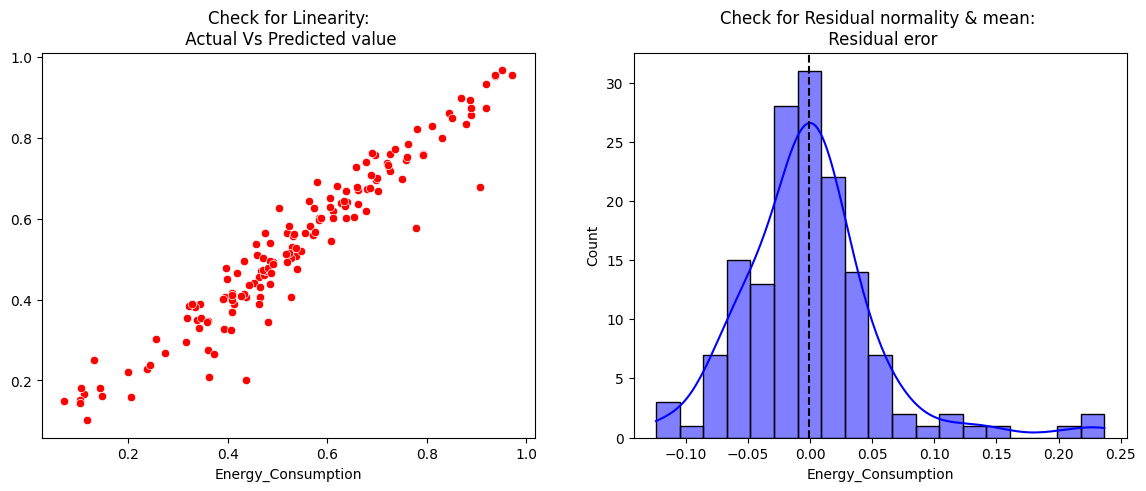

In [71]:
# Checking for linearity
f = plt.figure(figsize=(14,5))
ax = f.add_subplot(121)
sns.scatterplot(x=y_test, y=y_pred, ax=ax, color='r')
ax.set_title('Check for Linearity:\n Actual Vs Predicted value')

# Checking for residual normality & mean
ax = f.add_subplot(122)
sns.histplot(x=(y_test - y_pred), ax=ax, color='b', kde=True)
ax.axvline((y_test - y_pred).mean(), color='k', linestyle='--')
ax.set_title('Check for Residual normality & mean: \n Residual eror');

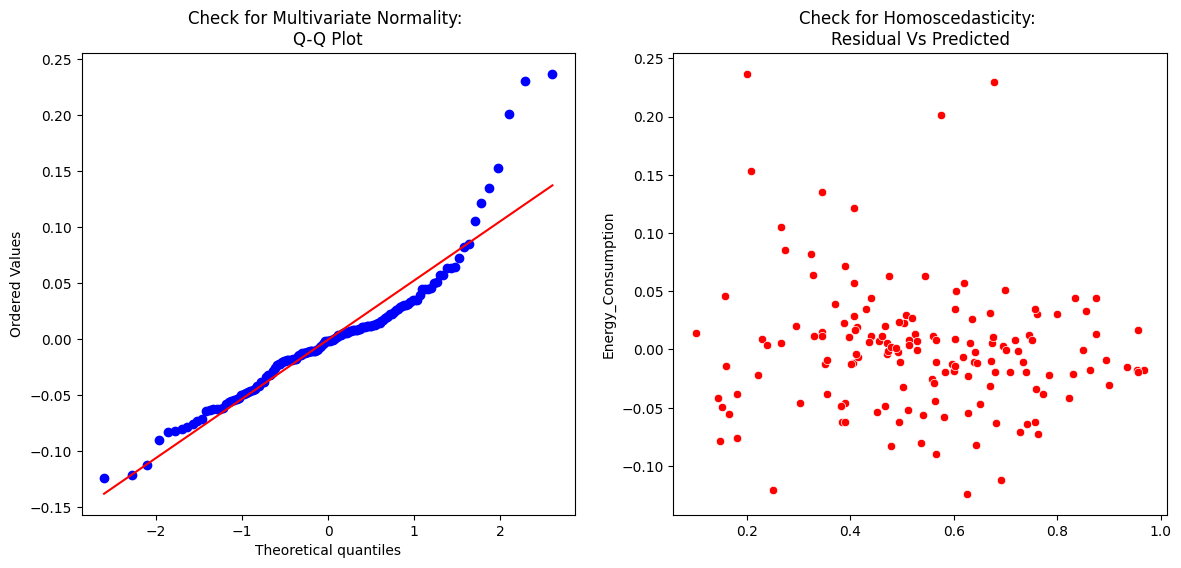

In [72]:
# Check for Multivariate Normality
# Quantile-Quantile plot
f,ax = plt.subplots(1,2,figsize=(14,6))
import scipy as sp
_,(_,_,r)= sp.stats.probplot((y_test - y_pred), fit=True, plot=ax[0])
ax[0].set_title('Check for Multivariate Normality: \nQ-Q Plot')

#Check for Homoscedasticity
sns.scatterplot(x=y_pred, y=(y_test - y_pred), ax=ax[1], color='r')
ax[1].set_title('Check for Homoscedasticity: \nResidual Vs Predicted');

In [73]:
# Check for Multicollinearity
# Variance Inflation Factor
from statsmodels.stats.outliers_influence import variance_inflation_factor

VIF_data = pd.DataFrame()
VIF_data['feature'] = x.columns

VIF_data['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
VIF_data

,feature,VIF
0,SquareFootage,6.283870
1,Average_Temperature,8.382249
2,Days_since_last_maintenance,4.025396
3,Building_Type_Industrial,2.002496
4,Building_Type_Residential,2.266682
5,Occupancy_Level_Low,2.014972
6,Occupancy_Level_Medium,1.937101
7,Appliances_Usage_Level_Low,2.025095
8,Appliances_Usage_Level_Medium,1.985707
9,Governorate_Cairo,1.798678


## Conclusion and Recommendations

Comment on the model performance and your findings from model evaluation. State the problems (if any) and suggest possible solutions. Would you recommend this model for an electrcity company aiming to estimate the energy levels of each building?

**Answer**: your answer here.